In [159]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [160]:
bkgtrees = ObjIter([Tree(fc.eightb.preselection.QCD_B_List + [fc.eightb.preselection.TTJets])])

In [161]:
datatrees = ObjIter([Tree(fc.eightb.preselection_passthrough.JetHT_Data_UL_List)])

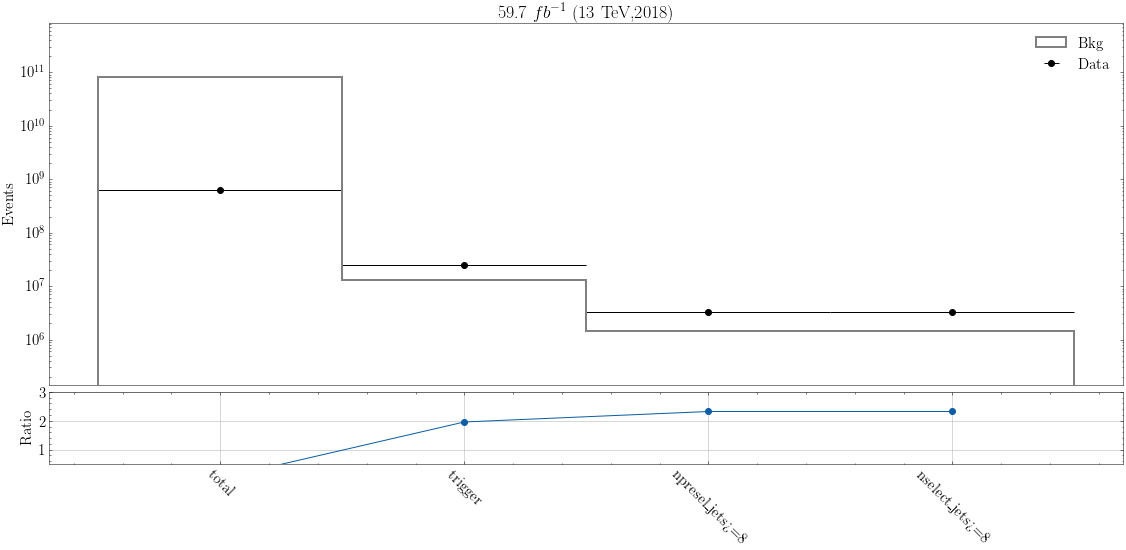

(<Figure size 1152x576 with 2 Axes>,
 <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, ylabel='Events'>)

In [162]:
study.cutflow(
    datatrees + bkgtrees,
    stacked=True,
    ratio=True,
    r_ylim=(0.5,3.0)
)

In [163]:
(datatrees+bkgtrees).extend(kwargs=lambda t : dict(
    n_loose_btag = ak.sum(t.jet_btag>jet_btagWP[1],axis=-1),
    n_medium_btag = ak.sum(t.jet_btag>jet_btagWP[2],axis=-1),
    n_tight_btag = ak.sum(t.jet_btag>jet_btagWP[3],axis=-1),
))

In [164]:
varinfo.clear()

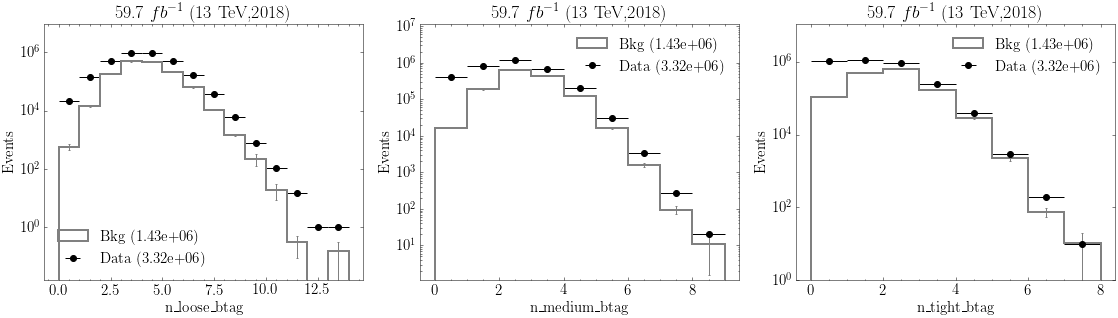

(<Figure size 1152x360 with 3 Axes>,
 array([<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_loose_btag', ylabel='Events'>,
        <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_medium_btag', ylabel='Events'>,
        <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_tight_btag', ylabel='Events'>],
       dtype=object))

In [165]:
study.quick(
    datatrees+bkgtrees,
    varlist=['n_loose_btag','n_medium_btag','n_tight_btag'],
    stacked=True,
    log=True,
    dim=(-1,3)
)

In [166]:
all_trees = (datatrees+bkgtrees).apply(EventFilter("nloose_1jet",n_loose_btag_emin=1).filter)

In [167]:
all_trees.expected_events()

[3299709.0, 1430135.2277738953]

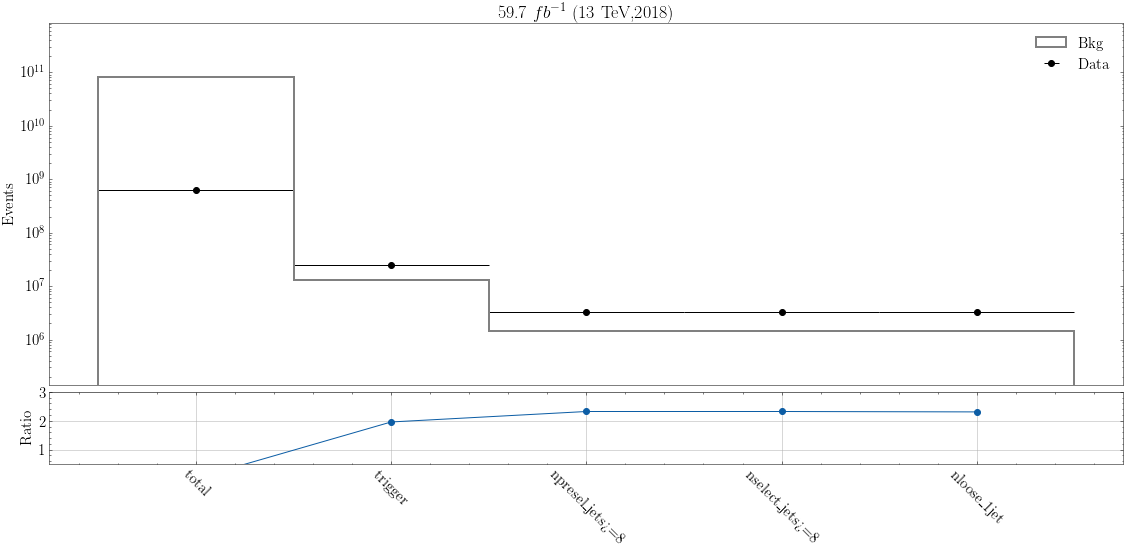

(<Figure size 1152x576 with 2 Axes>,
 <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, ylabel='Events'>)

In [168]:
study.cutflow(all_trees,stacked=True,ratio=True,r_ylim=(0.5,3.0))

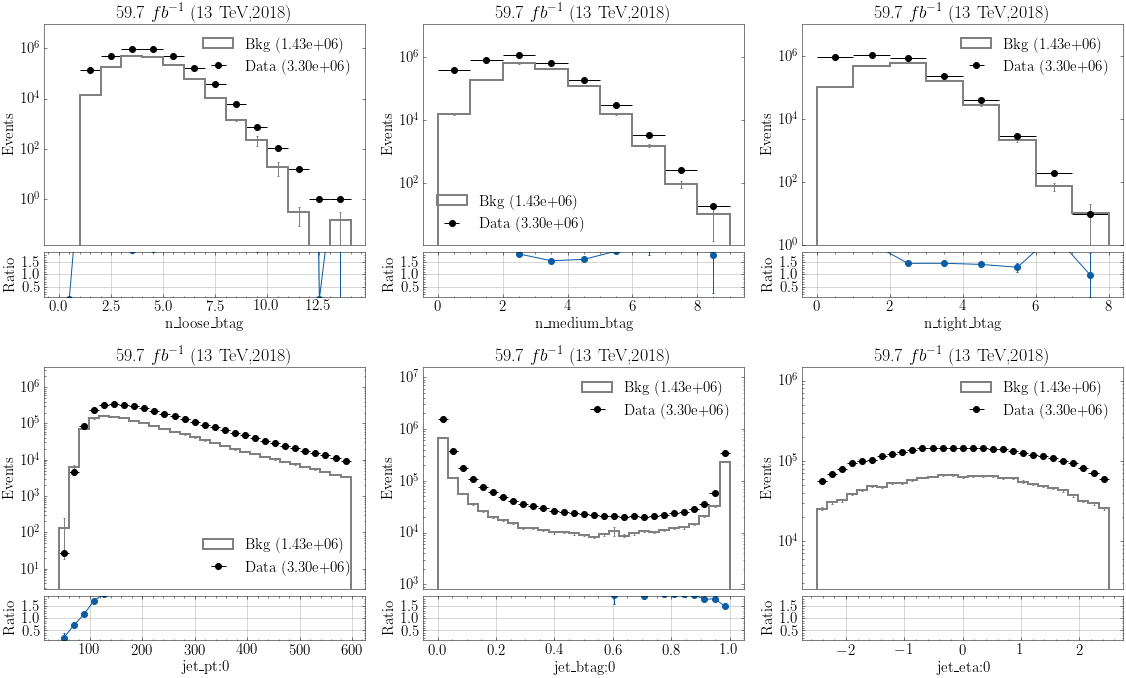

(<Figure size 1152x720 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_loose_btag', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_medium_btag', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_tight_btag', ylabel='Events'>],
        [<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='jet_pt:0', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='jet_btag:0', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='jet_eta:0', ylabel='Events'>]],
       dtype=object))

In [169]:
study.quick(
    all_trees,
    varlist=['n_loose_btag','n_medium_btag','n_tight_btag','jet_pt:0','jet_btag:0','jet_eta:0'],
    stacked=True,
    # s_xsec_scales=[None,1.5,1.5],
    log=True,
    dim=(-1,3),
    ratio=True
)

In [170]:
all_trees = all_trees.apply(EventFilter("ntight_2jet",n_tight_btag_emin=2).filter)

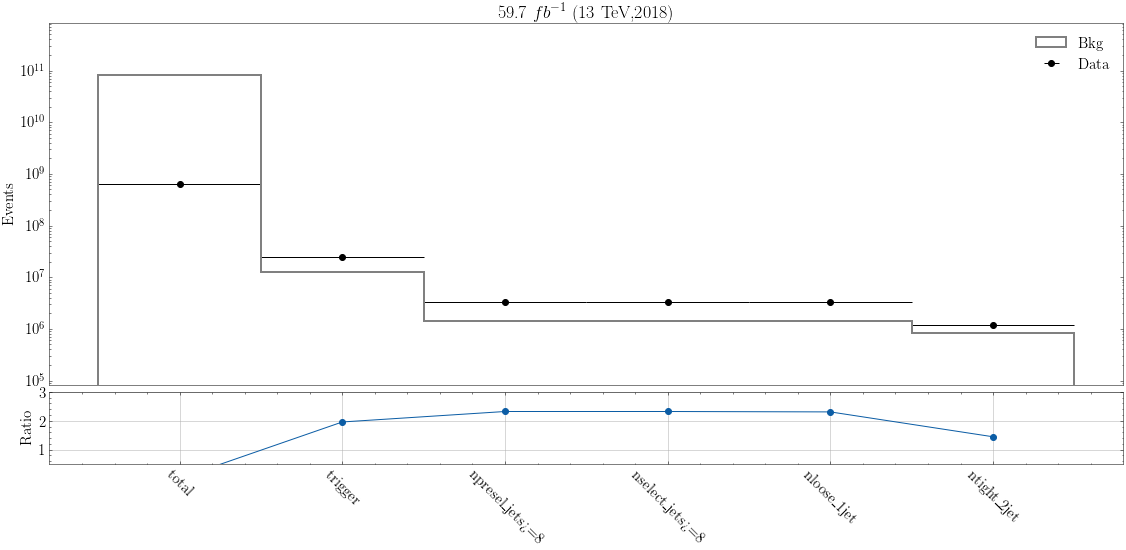

(<Figure size 1152x576 with 2 Axes>,
 <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, ylabel='Events'>)

In [171]:
study.cutflow(all_trees,stacked=True,ratio=True,r_ylim=(0.5,3.0))

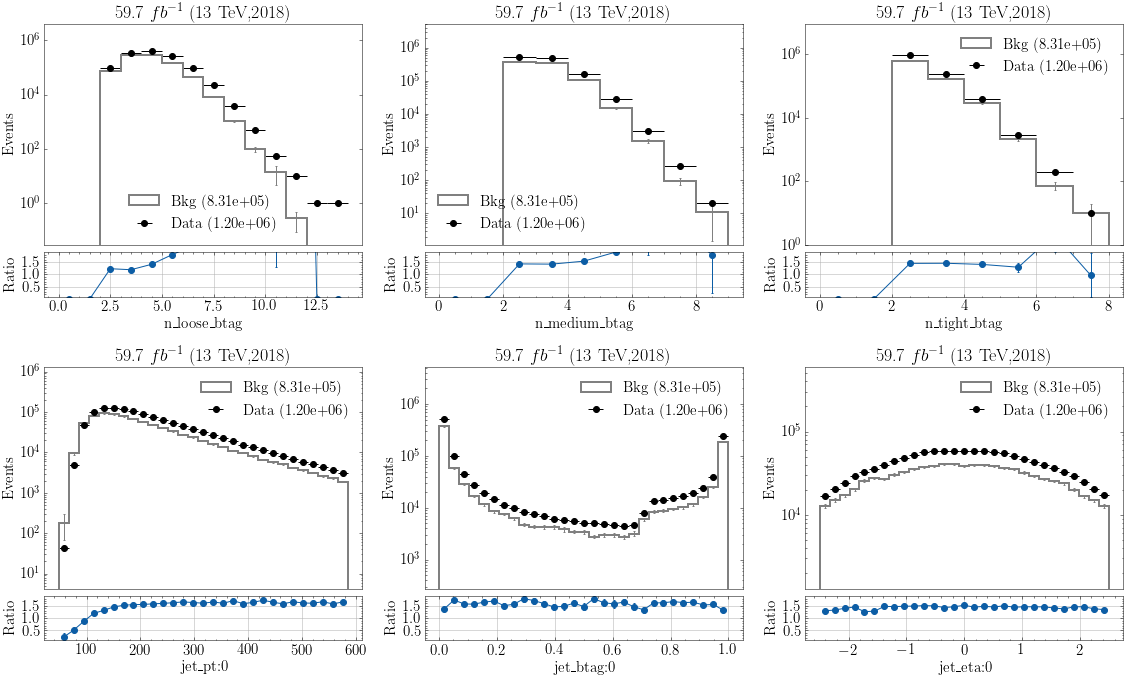

(<Figure size 1152x720 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_loose_btag', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_medium_btag', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_tight_btag', ylabel='Events'>],
        [<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='jet_pt:0', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='jet_btag:0', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='jet_eta:0', ylabel='Events'>]],
       dtype=object))

In [172]:
study.quick(
    all_trees,
    varlist=['n_loose_btag','n_medium_btag','n_tight_btag','jet_pt:0','jet_btag:0','jet_eta:0'],
    stacked=True,
    # s_xsec_scales=[None,1.5,1.5],
    log=True,
    dim=(-1,3),
    ratio=True
)

In [173]:
rhobins = np.linspace(0,80,20)

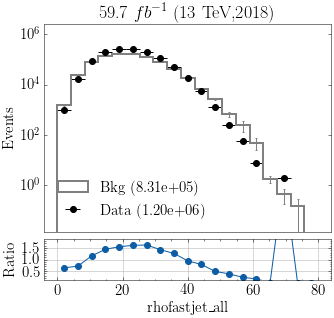

In [174]:
fig,axs = study.quick(
    all_trees,
    varlist=['rhofastjet_all'],
    stacked=True,
    # s_xsec_scales=[None,1.5,1.5],
    log=True,
    binlist=[rhobins],
    # dim=(-1,3),
    ratio=True
)

In [175]:
def make_histogram(tree,variable,bins):
    return np.histogram(tree[variable],bins=bins,weights=tree.scale)[0]

rhohists = all_trees.apply(lambda t : make_histogram(t,'rhofastjet_all',rhobins))

In [176]:
datahist,bkghist = rhohists
bkghist=lumiMap[2018][0]*bkghist


In [177]:
rhoscale = ak.from_regular(datahist/bkghist)
rhoscale = ak.where(~np.isnan(rhoscale),rhoscale,1)
rhoscale = ak.concatenate((rhoscale,1))

/tmp/ipykernel_167600/1700613953.py:1: RuntimeWarning: invalid value encountered in true_divide
  rhoscale = ak.from_regular(datahist/bkghist)


In [178]:
rhoscale

<Array [0.642, 0.714, 1.16, 1.44, ... 0, 1, 1] type='20 * float64'>

(<Figure size 384x360 with 1 Axes>, <AxesSubplot:>)

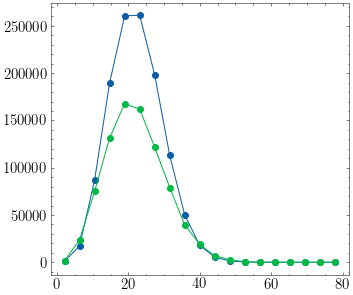

In [179]:
graph_multi((rhobins[:-1]+rhobins[1:])/2,[datahist,bkghist],density=True)

(<Figure size 384x360 with 1 Axes>, <AxesSubplot:>)

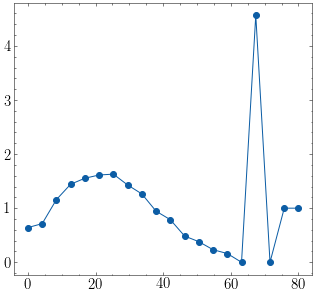

In [180]:
graph_simple(rhobins,rhoscale)

In [181]:
def get_rhoscale(tree,rhobins=rhobins,rhoscale=rhoscale):
    rhomask = ak.argmax((rhobins[None,None,:-1] <= tree.rhofastjet_all[:,None]) & (tree.rhofastjet_all[:,None] < rhobins[None,None,1:]),axis=-1)[:,0]
    return rhoscale[rhomask]

In [182]:
all_trees.extend(kwargs=lambda t : dict(
    prescale = t.scale,
    scale = t.scale if t.is_data else t.scale*get_rhoscale(t)
))

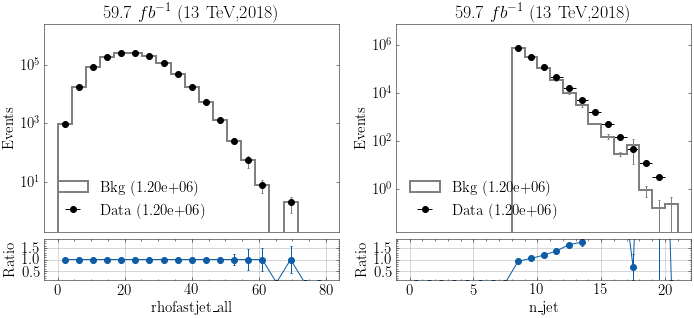

In [183]:
fig,axs = study.quick(
    all_trees,
    varlist=['rhofastjet_all','n_jet'],
    stacked=True,
    # s_xsec_scales=ObjIter([None]) + bkg_rhoscales,
    log=True,
    binlist=[rhobins],
    # dim=(-1,3),
    ratio=True
)

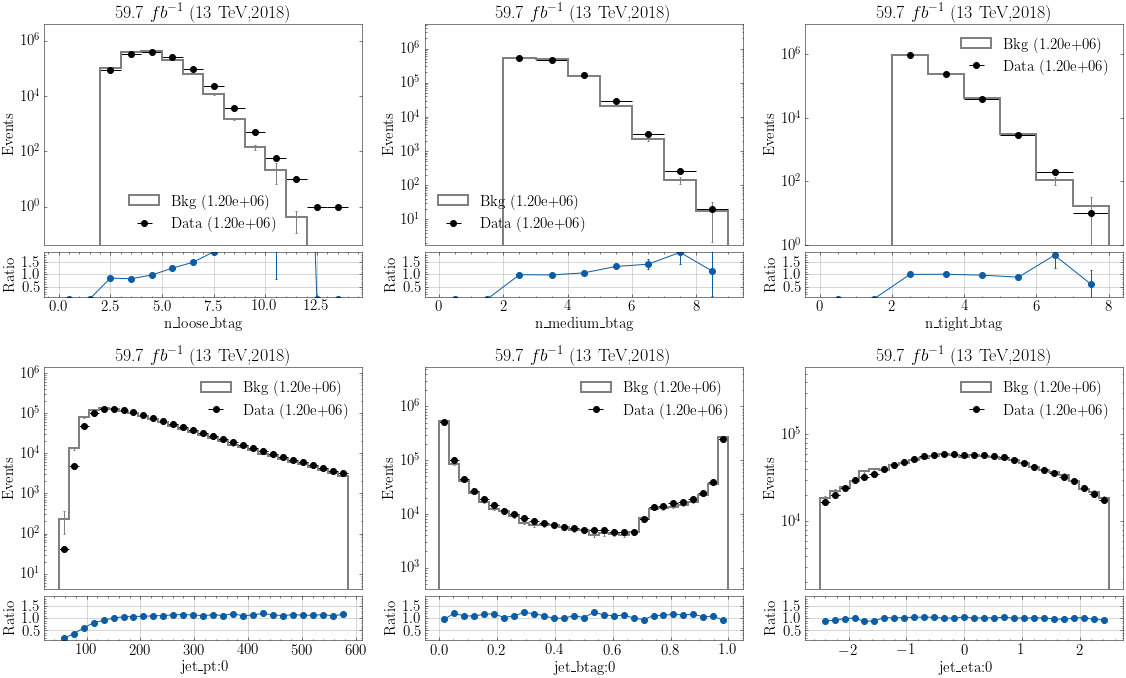

(<Figure size 1152x720 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_loose_btag', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_medium_btag', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='n_tight_btag', ylabel='Events'>],
        [<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='jet_pt:0', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='jet_btag:0', ylabel='Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='jet_eta:0', ylabel='Events'>]],
       dtype=object))

In [184]:
study.quick(
    all_trees,
    varlist=['n_loose_btag','n_medium_btag','n_tight_btag','jet_pt:0','jet_btag:0','jet_eta:0'],
    stacked=True,
    # s_xsec_scales=ObjIter([None]) + bkg_rhoscales,
    log=True,
    dim=(-1,3),
    ratio=True
)

In [185]:
signaltrees = ObjIter([ Tree(f) for f in fc.eightb.preselection.signal_list ])

In [186]:
for tree in signaltrees: tree.color=None

In [187]:
(bkgtrees+signaltrees).extend(kwargs=lambda t : build_collection(t,'H\dY\d','higgs',ptordered=True))

In [188]:
hm_means = ak.mean(signaltrees.higgs_m.apply(lambda array : ak.mean(array,axis=0)),axis=0) 
hm_means = np.array(hm_means,dtype=float)

In [189]:
def calc_dm(tree,hm_means=hm_means):
    dm = np.abs(tree.higgs_m.to_numpy() - hm_means)
    tree.extend(higgs_dm=ak.from_regular(dm))
    
(bkgtrees+signaltrees).apply(calc_dm)

In [190]:
def calc_m_asym(tree):
    higgs_m = tree.higgs_m.to_numpy()
    higgs_m.sort()
    tree.extend(
        hm12_asym = (higgs_m[:,3]-higgs_m[:,2])/(higgs_m[:,3]+higgs_m[:,2]),
        hm13_asym = (higgs_m[:,3]-higgs_m[:,1])/(higgs_m[:,3]+higgs_m[:,1]),
        hm14_asym = (higgs_m[:,3]-higgs_m[:,0])/(higgs_m[:,3]+higgs_m[:,0]),
        
        hm23_asym = (higgs_m[:,2]-higgs_m[:,1])/(higgs_m[:,2]+higgs_m[:,1]),
        hm24_asym = (higgs_m[:,2]-higgs_m[:,0])/(higgs_m[:,2]+higgs_m[:,0]),
        
        hm34_asym = (higgs_m[:,1]-higgs_m[:,0])/(higgs_m[:,1]+higgs_m[:,0])
    )
    
(bkgtrees+signaltrees).apply(calc_m_asym)

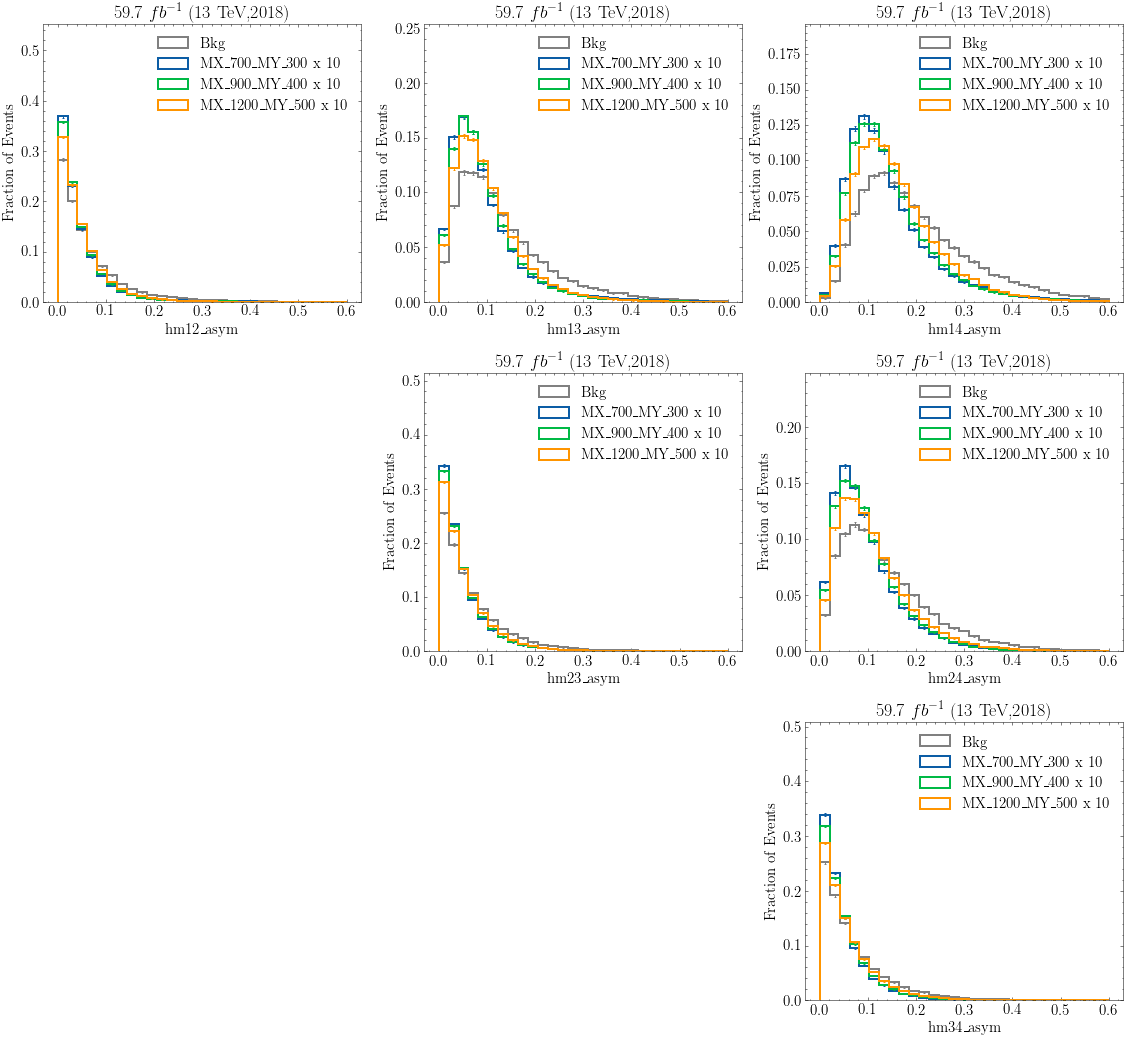

In [191]:
varinfo.higgs_m = dict(bins=np.linspace(0,500,30))

study.quick(
    bkgtrees + signaltrees[[0,4,7]],
    varlist = ["hm12_asym","hm13_asym","hm14_asym",None,"hm23_asym","hm24_asym",None,None,"hm34_asym"],
    binlist=[np.linspace(0,0.6,30)]*9,
    stacked=True,
    s_label_stat=None,
    s_xsec_scales=[None]+[10]*3,
    # log=True,
    # cumulative=-1,
    density=True,
    # s_xsec_scales=bkg_rhoscales,
    dim=(-1,3),
);

In [192]:
def hm_asym_diff(tree,ar=(0.05,0.05),vr=(0.16,0.16)):
    arx,ary = ar
    vrx,vry = vr
    tree.extend(
        hm_asym_diff= np.sqrt((tree.hm13_asym - arx)**2 + (tree.hm24_asym - ary)**2),
        hm_asym_diff_vr= np.sqrt((tree.hm13_asym - vrx)**2 + (tree.hm24_asym - vry)**2)
    )

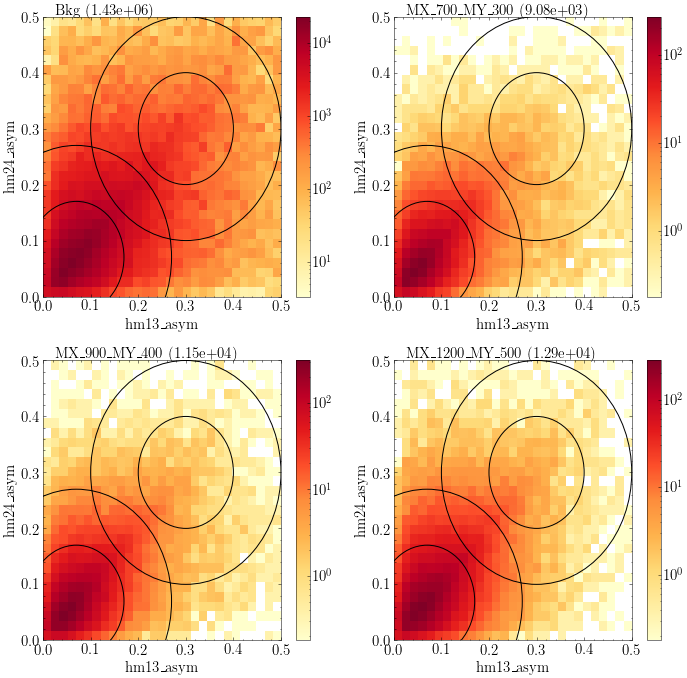

In [193]:
fig,axs = study.quick2d(
    bkgtrees + signaltrees[[0,4,7]],
    varlist = ["hm13_asym","hm24_asym"],
    binlist=[np.linspace(0,0.5,30)]*2,
    stacked=True,
    s_label_stat=None,
    s_xsec_scales=[None]+[10]*3,
    log=True,
    # log=True,
    # cumulative=-1,
    # density=True,
    # s_xsec_scales=bkg_rhoscales,
)

ar = (0.07,0.07)
vr = (0.3,0.3)
sr,cr = 0.1,0.2

for ax in axs.flat: 
    
    sr_circle = plt.Circle(ar,sr,color='k',fill=None)
    cr_circle = plt.Circle(ar,cr,color='k',fill=None)
    ax.add_patch(sr_circle)
    ax.add_patch(cr_circle)
    
    
    vsr_circle = plt.Circle(vr,sr,color='k',fill=None)
    vcr_circle = plt.Circle(vr,cr,color='k',fill=None)
    ax.add_patch(vsr_circle)
    ax.add_patch(vcr_circle)
    
plt.show()

In [194]:
(bkgtrees+signaltrees).apply(lambda t : hm_asym_diff(t,ar=ar,vr=vr))

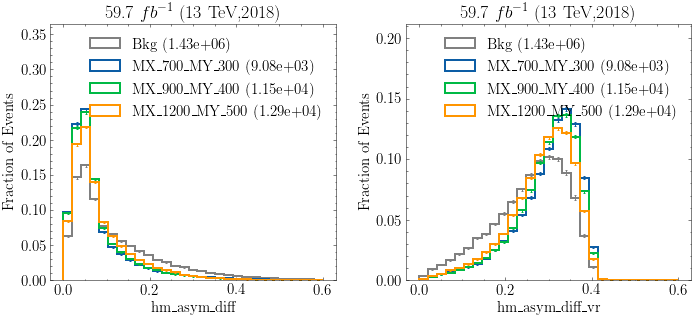

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='hm_asym_diff', ylabel='Fraction of Events'>,
        <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='hm_asym_diff_vr', ylabel='Fraction of Events'>],
       dtype=object))

In [195]:
study.quick(
    bkgtrees+signaltrees[[0,4,7]],
    varlist=['hm_asym_diff','hm_asym_diff_vr'],
    binlist=[np.linspace(0,0.6,30)]*2,
    density=True
)

In [196]:
asr_events = (signaltrees+bkgtrees).apply(lambda t : lumiMap[2018][0]*t.scale[t.hm_asym_diff < sr]).apply(ak.sum)

In [197]:
acr_events = (signaltrees+bkgtrees).apply(lambda t : lumiMap[2018][0]*t.scale[(t.hm_asym_diff < cr) & (t.hm_asym_diff > sr)]).apply(ak.sum)

In [198]:
vsr_events = (signaltrees+bkgtrees).apply(lambda t : lumiMap[2018][0]*t.scale[t.hm_asym_diff_vr < sr]).apply(ak.sum)

In [199]:
vcr_events = (signaltrees+bkgtrees).apply(lambda t : lumiMap[2018][0]*t.scale[(t.hm_asym_diff_vr < cr) & (t.hm_asym_diff_vr > sr)]).apply(ak.sum)

In [200]:
asr_filter = EventFilter('asr',hm_asym_diff_max=sr)
acr_filter = EventFilter('acr',hm_asym_diff_min=sr,hm_asym_diff_max=cr)

vsr_filter = EventFilter('vsr',hm_asym_diff_vr_max=sr)
vcr_filter = EventFilter('vcr',hm_asym_diff_vr_min=sr,hm_asym_diff_vr_max=cr)


medium_4btag_filter = EventFilter("medium_4btag",filter=lambda t : ak.sum(t.jet_btag > jet_btagWP[2],axis=-1) > 3)
medium_inv_3btag_filter = EventFilter("medium_inv_3btag",filter=lambda t : ak.sum(t.jet_btag > jet_btagWP[2],axis=-1) == 3)

In [201]:
vcr_trees = (signaltrees+bkgtrees).apply(vcr_filter.filter)
vsr_trees = (signaltrees+bkgtrees).apply(vsr_filter.filter)

In [202]:
acr_trees = (signaltrees+bkgtrees).apply(acr_filter.filter)
asr_trees = (signaltrees+bkgtrees).apply(asr_filter.filter)

In [203]:
vcr1_trees = vcr_trees.apply(medium_4btag_filter.filter)
vcr2_trees = vcr_trees.apply(medium_inv_3btag_filter.filter)

In [204]:
vsr1_trees = vsr_trees.apply(medium_4btag_filter.filter)
vsr2_trees = vsr_trees.apply(medium_inv_3btag_filter.filter)

In [205]:
asr1_trees = asr_trees.apply(medium_4btag_filter.filter)
asr2_trees = asr_trees.apply(medium_inv_3btag_filter.filter)

In [206]:
acr1_trees = acr_trees.apply(medium_4btag_filter.filter)
acr2_trees = acr_trees.apply(medium_inv_3btag_filter.filter)

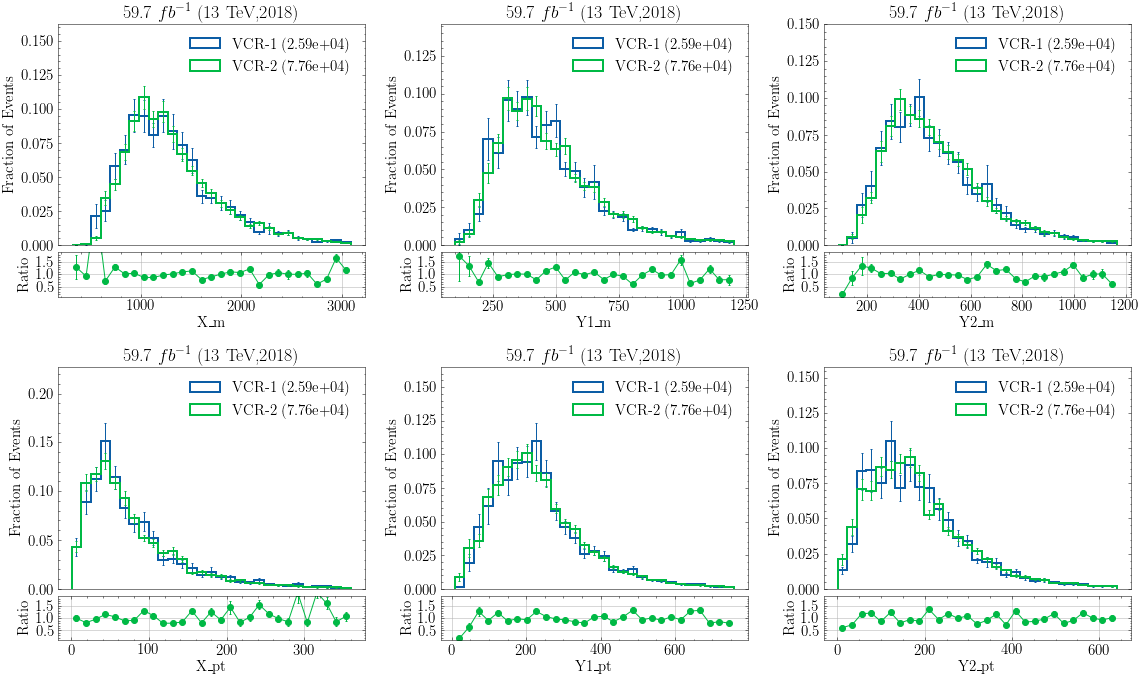

(<Figure size 1152x720 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='X_m', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y1_m', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y2_m', ylabel='Fraction of Events'>],
        [<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='X_pt', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y1_pt', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y2_pt', ylabel='Fraction of Events'>]],
       dtype=object))

In [209]:
study.quick(
    vcr1_trees[[-1]]+vcr2_trees[[-1]],
    varlist=['X_m','Y1_m','Y2_m','X_pt','Y1_pt','Y2_pt'],
    labels=['VCR-1','VCR-2'],
    s_colors=None,
    density=True,
    ratio=True,
    dim=(-1,3)
)

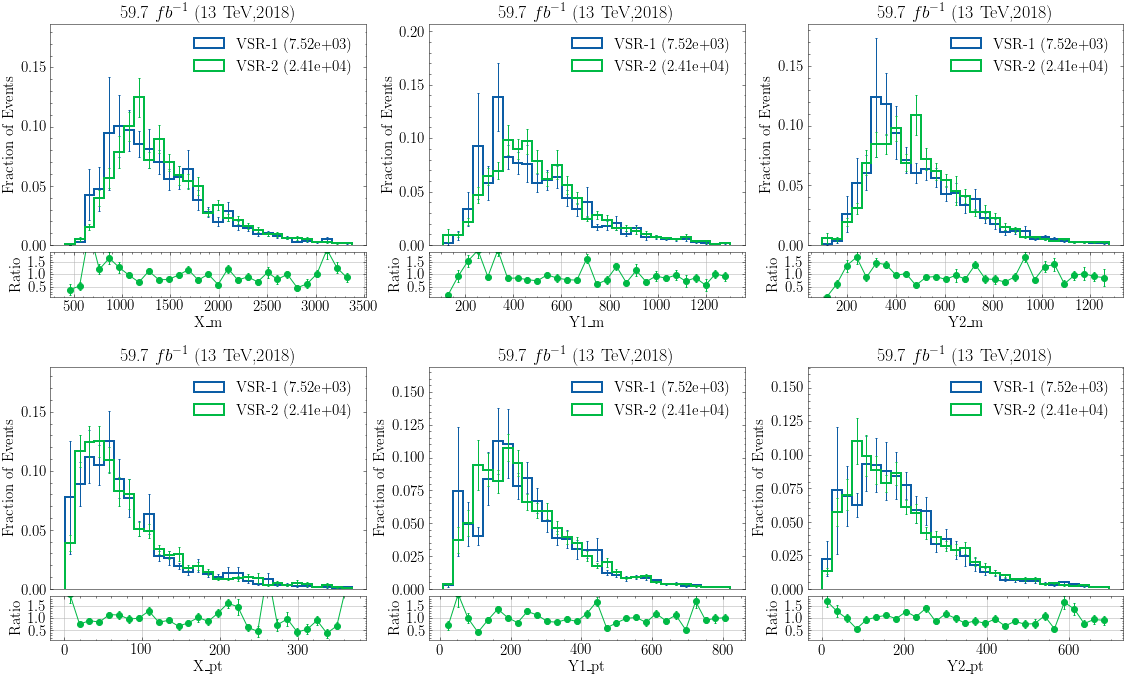

(<Figure size 1152x720 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='X_m', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y1_m', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y2_m', ylabel='Fraction of Events'>],
        [<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='X_pt', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y1_pt', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y2_pt', ylabel='Fraction of Events'>]],
       dtype=object))

In [210]:
study.quick(
    vsr1_trees[[-1]]+vsr2_trees[[-1]],
    varlist=['X_m','Y1_m','Y2_m','X_pt','Y1_pt','Y2_pt'],
    labels=['VSR-1','VSR-2'],
    s_colors=None,
    density=True,
    ratio=True,dim=(-1,3)
)

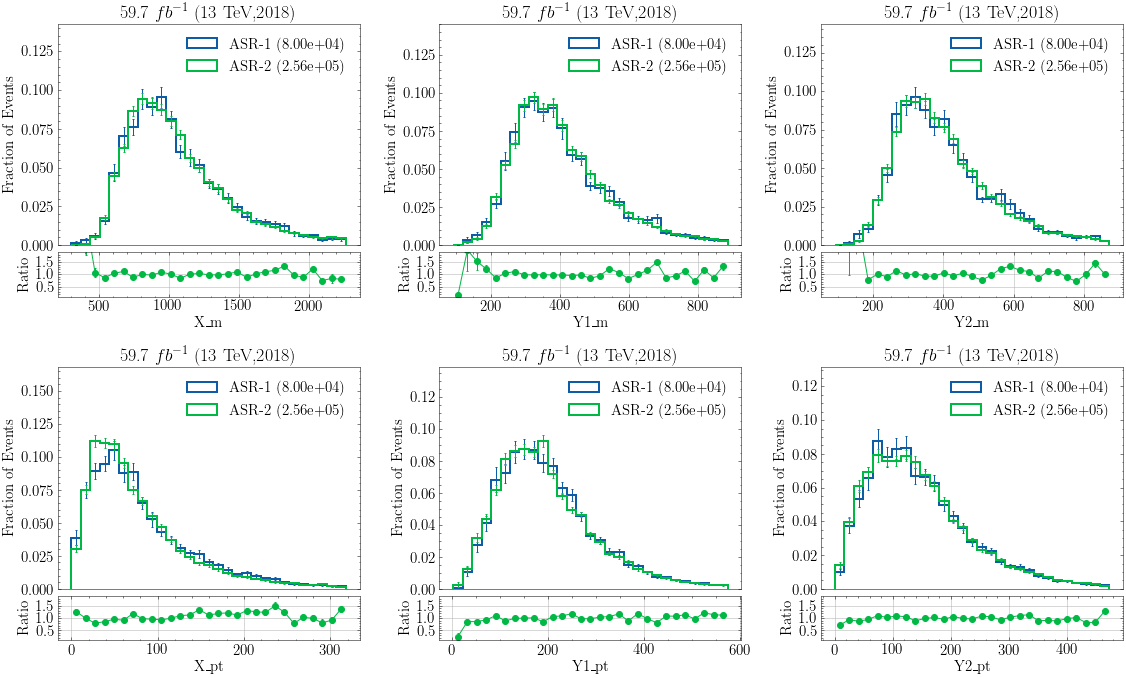

(<Figure size 1152x720 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='X_m', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y1_m', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y2_m', ylabel='Fraction of Events'>],
        [<AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='X_pt', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y1_pt', ylabel='Fraction of Events'>,
         <AxesSubplot:title={'center':'59.7 $fb^{-1}$ (13 TeV,2018)'}, xlabel='Y2_pt', ylabel='Fraction of Events'>]],
       dtype=object))

In [213]:
study.quick(
    asr1_trees[-1:]+asr2_trees[-1:],
    varlist=['X_m','Y1_m','Y2_m','X_pt','Y1_pt','Y2_pt'],
    labels=['ASR-1','ASR-2'],
    s_colors=None,
    density=True,
    ratio=True,
    dim=(-1,3)
);

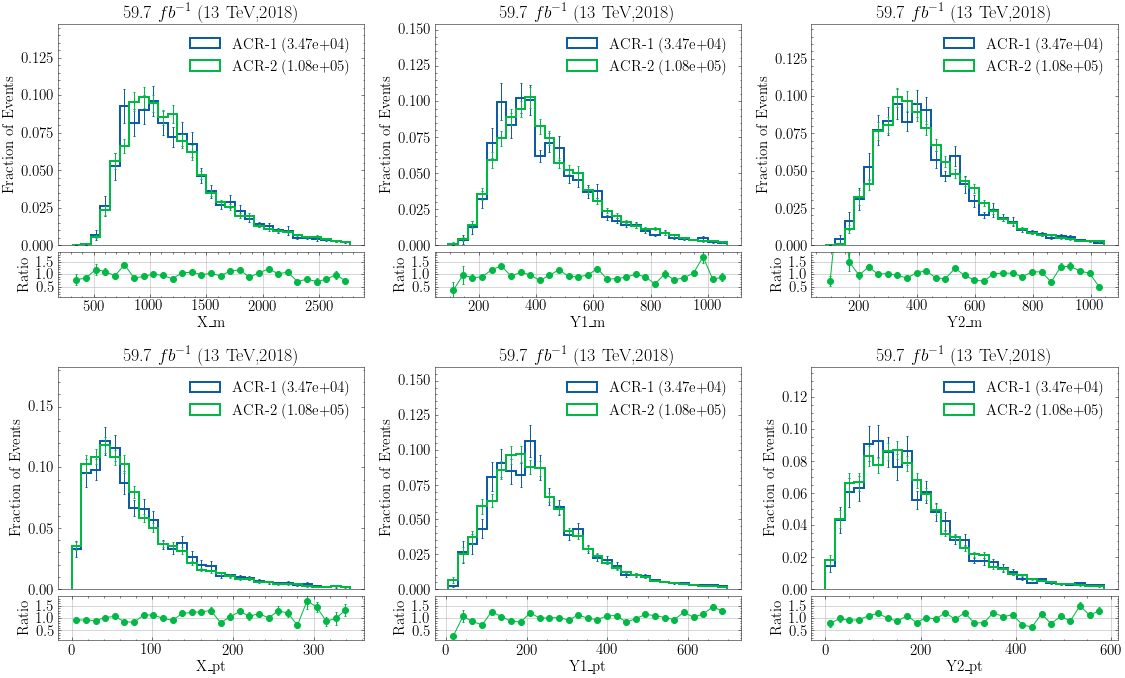

In [214]:
study.quick(
    acr1_trees[-1:]+acr2_trees[-1:],
    varlist=['X_m','Y1_m','Y2_m','X_pt','Y1_pt','Y2_pt'],
    labels=['ACR-1','ACR-2'],
    s_colors=None,
    density=True,
    ratio=True,
    dim=(-1,3)
);